In [1]:
import pandas as pd
import numpy as np

In [2]:
D = pd.read_csv('cancer_patient_data_sets.csv')

In [3]:
D = D.drop('Patient Id', axis=1)
D = D.drop('index', axis=1)

In [4]:
# low -> 1
# Medium -> 2
# High -> 3
D = D.replace({
   'Level': {'Low': int(1), 'Medium': int(2), 'High':int(3)},})
D

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,3
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,3
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,3
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,3
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,3
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,3


In [5]:
from sklearn.model_selection import train_test_split
X = D.drop(columns=['Level'])
y = D['Level']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=0) # 0.25 * 0.8 = 0.2

Level
3    225
2    202
1    173
Name: count, dtype: int64


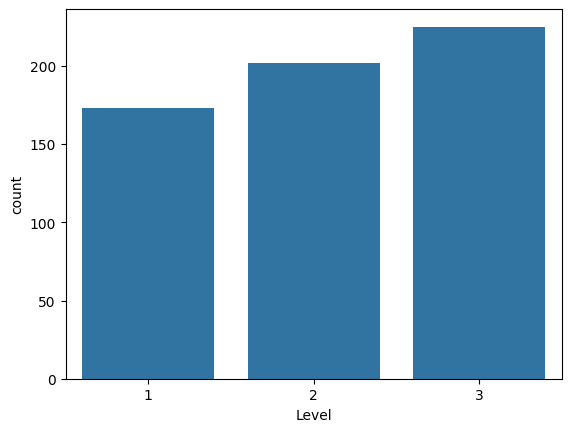

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
print(y_train.value_counts())
sns.countplot(x = y_train)
plt.xticks(rotation = 0);

In [7]:
import optuna
from sklearn.metrics import f1_score
from sklearn import svm

def objective(trial):
   svm_c = trial.suggest_float('svm_c', 1e-10, 1e10, log=True)
   kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
   clf = svm.SVC(C=svm_c, kernel=kernel)
   clf.fit(X_train, y_train)
   y_pred = clf.predict(X_test)
   f1 = f1_score(y_test, y_pred, average='micro')
   return f1

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
study = optuna.create_study(direction='maximize')

[I 2023-11-22 15:32:14,722] A new study created in memory with name: no-name-61432281-4b37-4f00-9cde-fdac2749d3cc


In [9]:
study.optimize(objective, n_trials=100)
study.best_params

[I 2023-11-22 15:32:16,878] Trial 0 finished with value: 1.0 and parameters: {'svm_c': 474.8573142125484, 'kernel': 'rbf'}. Best is trial 0 with value: 1.0.


[I 2023-11-22 15:32:16,965] Trial 1 finished with value: 0.375 and parameters: {'svm_c': 7.022605026444894e-07, 'kernel': 'rbf'}. Best is trial 0 with value: 1.0.
[I 2023-11-22 15:32:17,000] Trial 2 finished with value: 0.375 and parameters: {'svm_c': 1.4081228886622564e-08, 'kernel': 'linear'}. Best is trial 0 with value: 1.0.
[I 2023-11-22 15:32:17,030] Trial 3 finished with value: 1.0 and parameters: {'svm_c': 118.0649158332372, 'kernel': 'poly'}. Best is trial 0 with value: 1.0.
[I 2023-11-22 15:32:17,100] Trial 4 finished with value: 0.375 and parameters: {'svm_c': 0.0006220981133853732, 'kernel': 'rbf'}. Best is trial 0 with value: 1.0.
[I 2023-11-22 15:32:17,121] Trial 5 finished with value: 1.0 and parameters: {'svm_c': 30395115.56588506, 'kernel': 'poly'}. Best is trial 0 with value: 1.0.
[I 2023-11-22 15:32:17,146] Trial 6 finished with value: 1.0 and parameters: {'svm_c': 293860510.56128097, 'kernel': 'linear'}. Best is trial 0 with value: 1.0.
[I 2023-11-22 15:32:17,167] Tr

{'svm_c': 474.8573142125484, 'kernel': 'rbf'}

In [10]:
import optuna.visualization as vis

# Plotting Optimization History
optimization_history_plot = vis.plot_optimization_history(study)
optimization_history_plot.show()

# Plotting Parameter Importance
param_importance_plot = vis.plot_param_importances(study)
param_importance_plot.show()